**This notebook is important :) **

Does a simple argmax over the (Melody2) CNN outputs to produce melody2 estimates.
Scores estimates against the ground truth.
One of the paper plots is at the bottom of a qualitative example.

In [11]:
import motif
import motif.plot
import numpy as np
import mir_eval
import os
import medleydb as mdb
import seaborn
import csv
import glob
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
with open("../outputs/data_splits.json", 'r') as fhandle:
    dat_dict = json.load(fhandle)

In [4]:
cd ../deepsalience/

/Users/bittner/Dropbox/MARL/repos/multif0/deepsalience


In [5]:
import compute_training_data as C
import evaluate

In [42]:
thresh_vals = np.arange(0, 1, 0.1)
mel_accuracy = {v: [] for v in thresh_vals}

for trackid in dat_dict['validate']:

    mtrack = mdb.MultiTrack(trackid)
    if mtrack.dataset_version != 'V1':
        continue
    
    print(trackid)
    pred_path = "../experiment_output_submission/Model_11b_mel2_outputs/{}_prediction.npy".format(trackid)
    pitch_activations = np.load(pred_path)
    mel2 = mtrack.melody2_annotation
    mel2 = np.array(mel2).T
    ref_times, ref_freqs = (mel2[0], mel2[1])

    for thresh in thresh_vals:
        est_times, est_freqs = evaluate.pitch_activations_to_singlef0(pitch_activations, thresh)
        mel_scores = mir_eval.melody.evaluate(ref_times, ref_freqs, est_times, est_freqs)
        mel_accuracy[thresh].append(mel_scores['Overall Accuracy'])

BrandonWebster_DontHearAThing
BrandonWebster_YesSirICanFly
HezekiahJones_BorrowedHeart
MusicDelta_BebopJazz
MusicDelta_GriegTrolltog
MusicDelta_LatinJazz
MusicDelta_ModalJazz
SecretMountains_HighHorse
SweetLights_YouLetMeDown


In [43]:
accuracy_vals = [np.mean(mel_accuracy[thresh]) for thresh in thresh_vals]
best_thresh_idx = np.argmax(accuracy_vals)
best_thresh = thresh_vals[best_thresh_idx]

print("Best threshold is {} with an OA of {}".format(
    best_thresh, accuracy_vals[best_thresh_idx])
)

Best threshold is 0.3 with an OA of 0.673778568238


In [7]:
best_thresh = 0.3

In [12]:
def save_mel_prediction(est_times, est_freqs, fpath):
    with open(fpath, 'w') as fhandle:
        writer = csv.writer(fhandle, delimiter=',')
        for t, f in zip(est_times, est_freqs):
            writer.writerow([t, f])


AClassicEducation_NightOwl


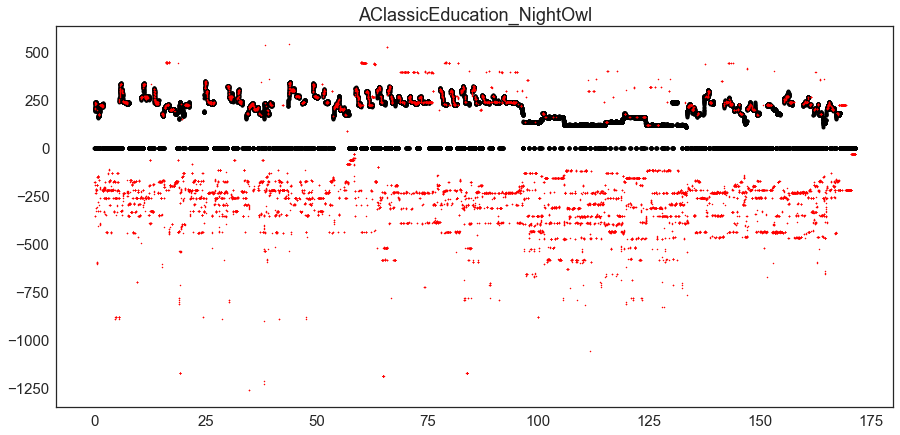

Auctioneer_OurFutureFaces


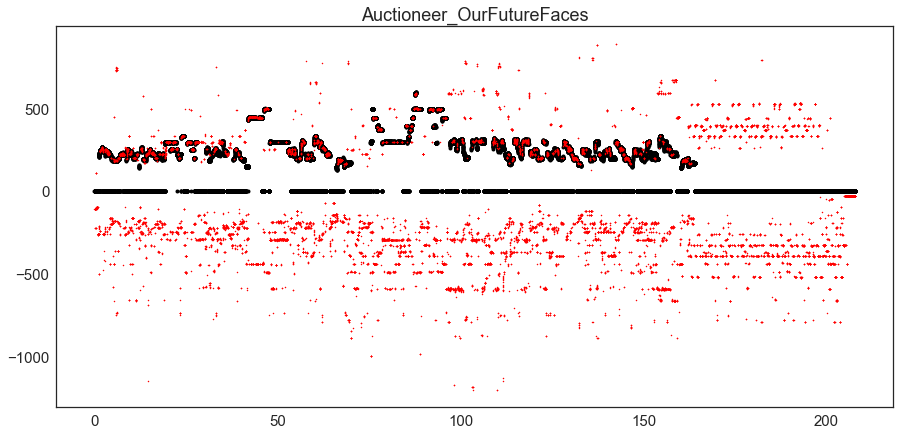

CelestialShore_DieForUs


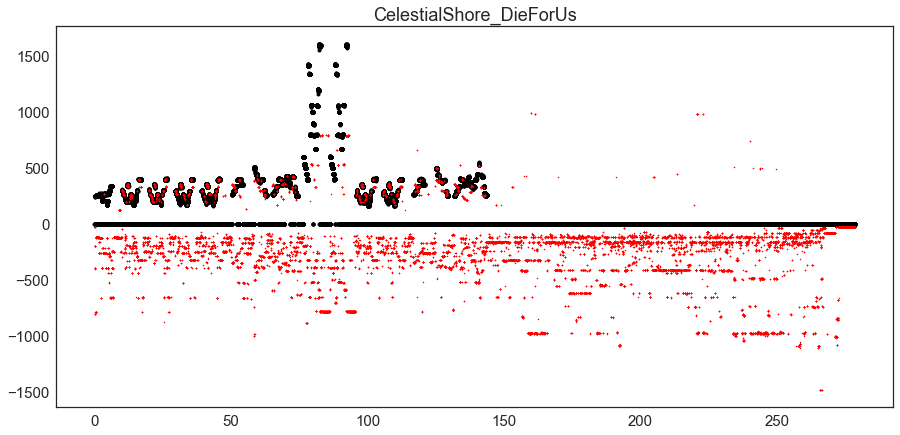

ChrisJacoby_BoothShotLincoln


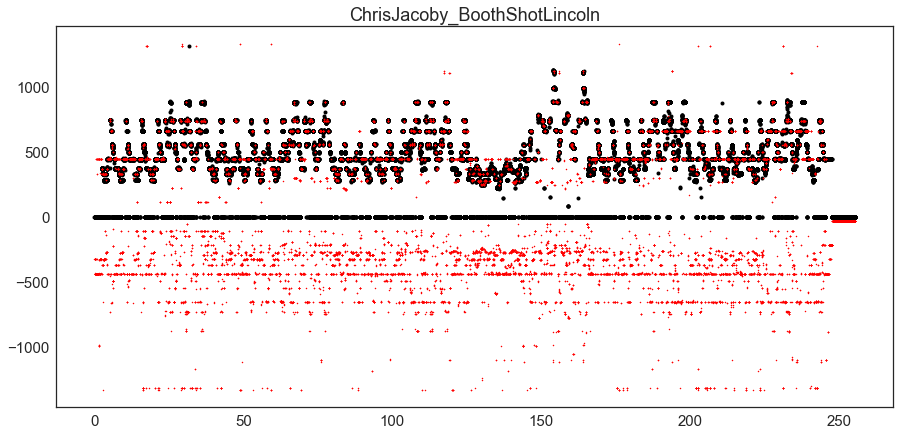

ChrisJacoby_PigsFoot


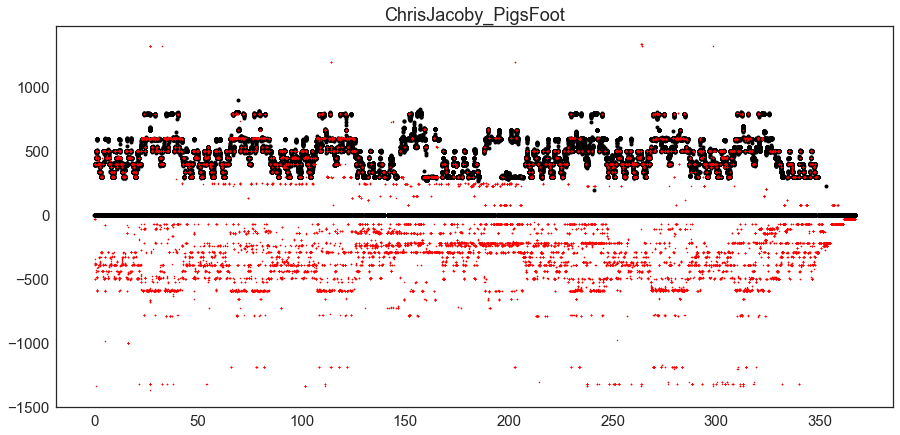

Creepoid_OldTree


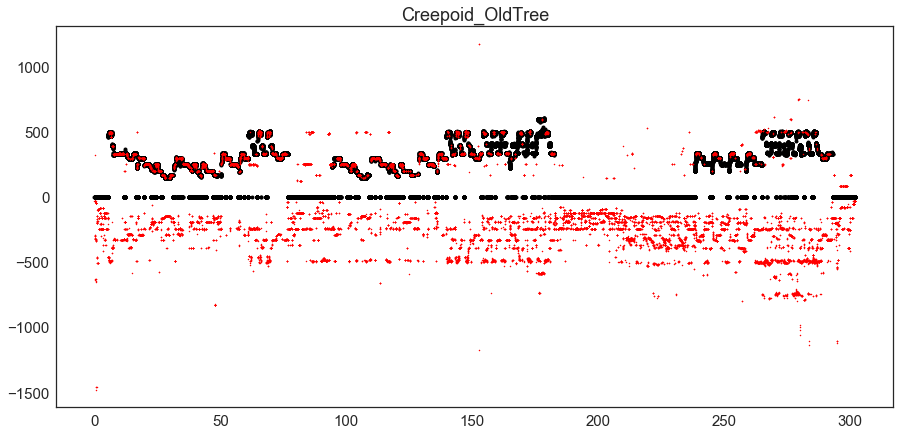

Debussy_LenfantProdigue


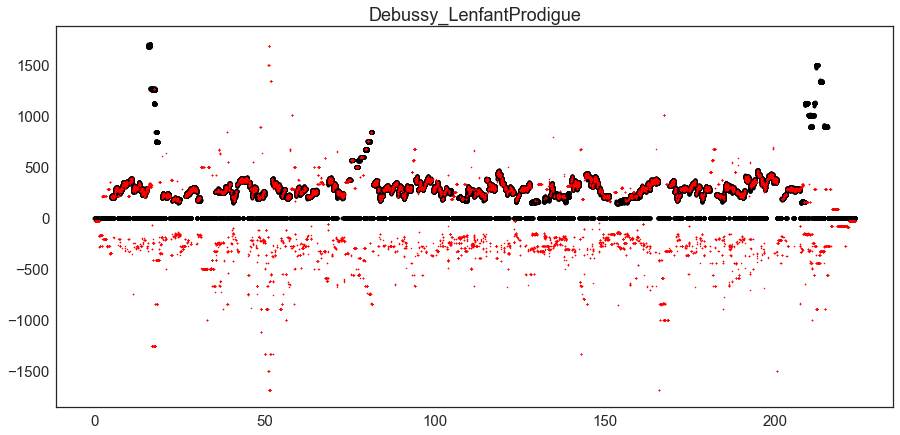

Grants_PunchDrunk
Grants_PunchDrunk
MatthewEntwistle_DontYouEver


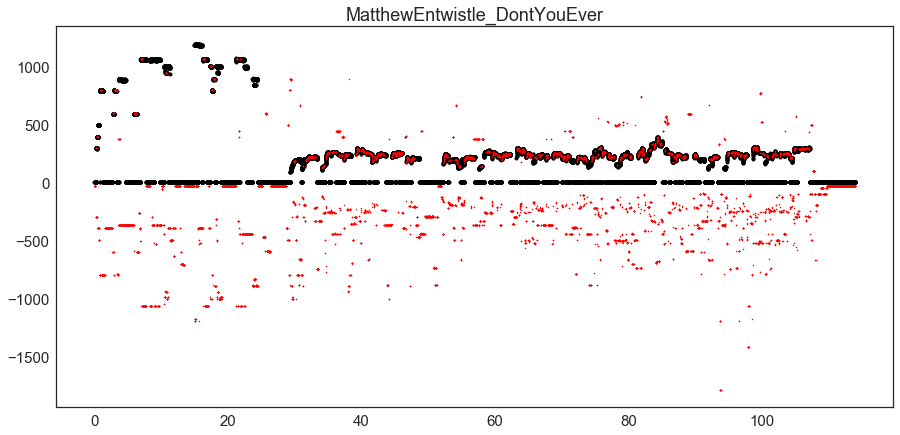

MatthewEntwistle_FairerHopes


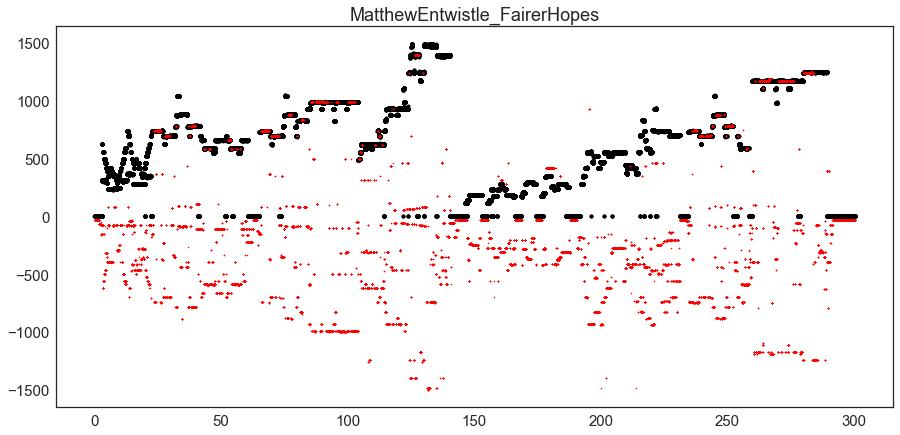

MatthewEntwistle_ImpressionsOfSaturn


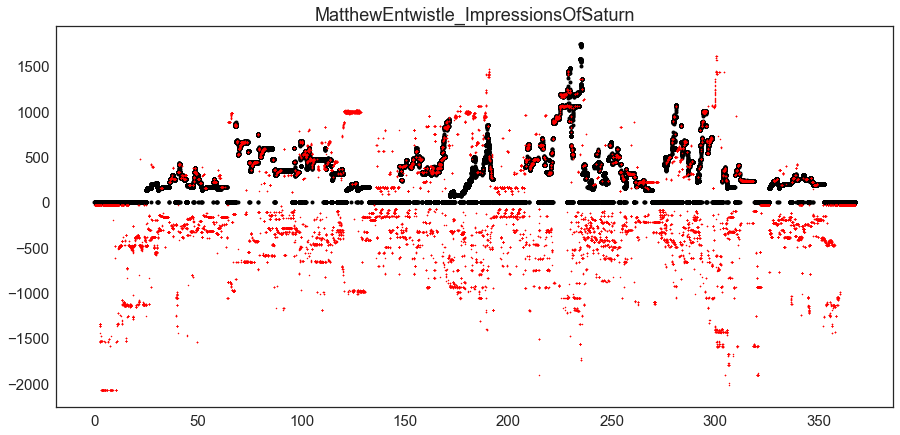

MatthewEntwistle_Lontano


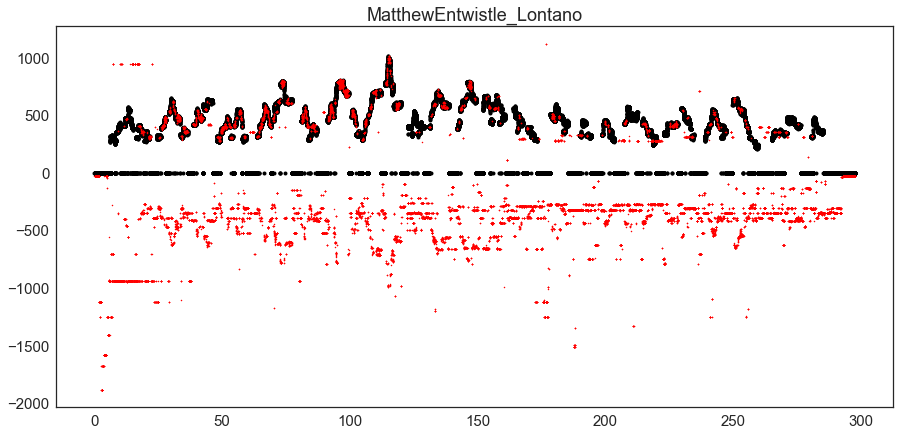

MatthewEntwistle_TheArch


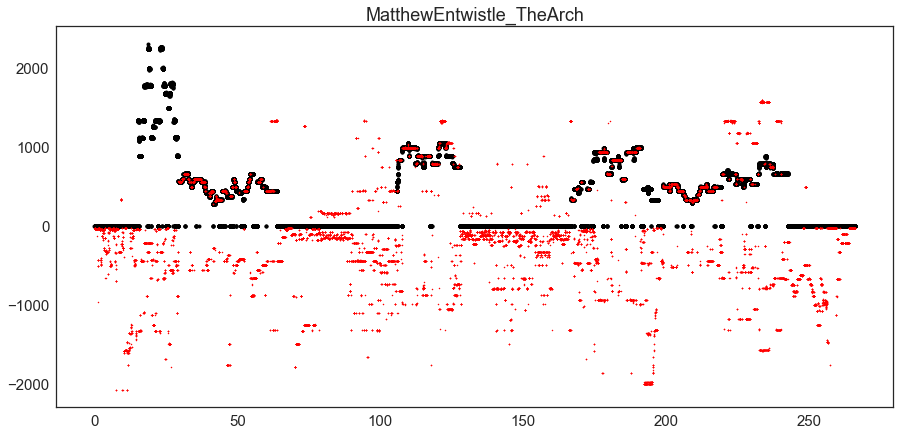

MatthewEntwistle_TheFlaxenField


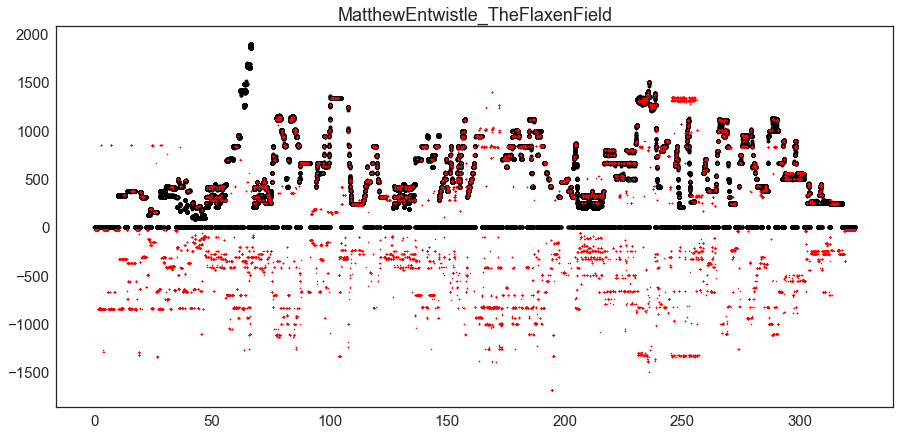

Mozart_DiesBildnis


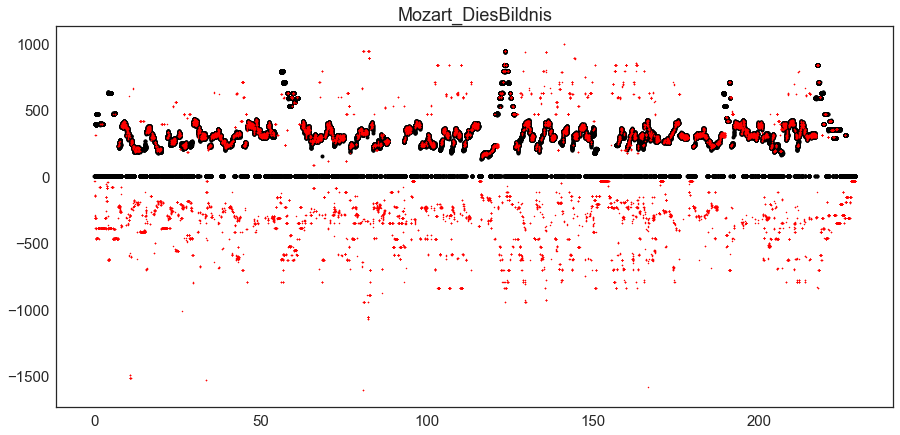

MusicDelta_FusionJazz


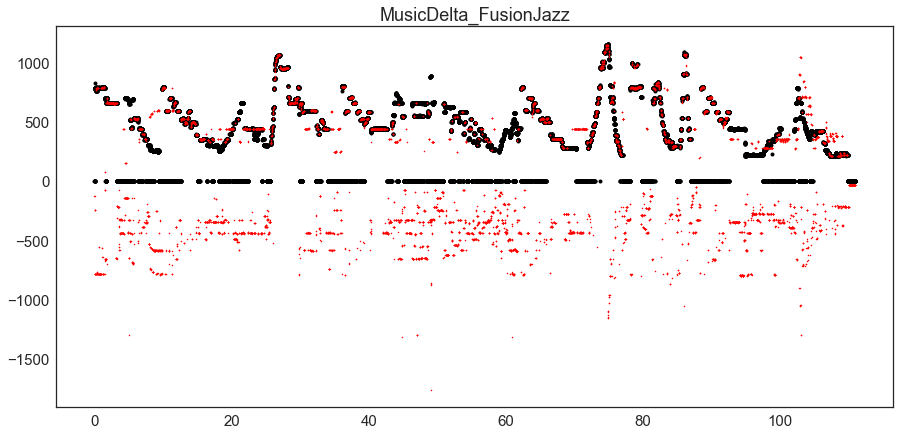

MusicDelta_Gospel


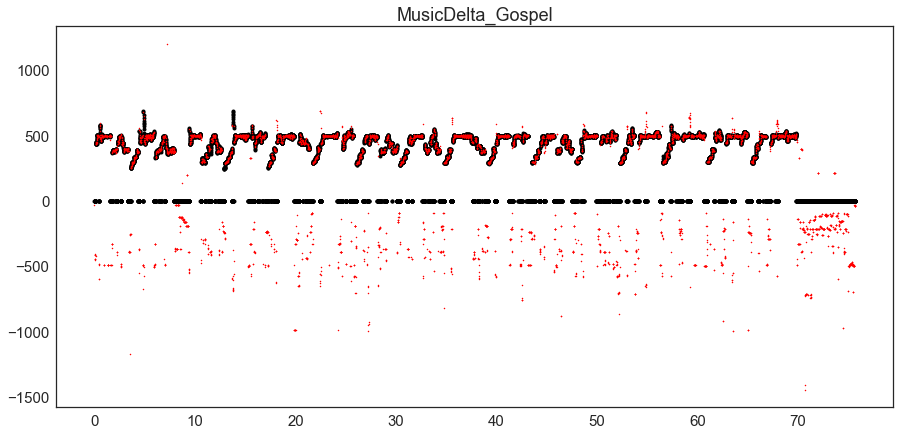

MusicDelta_Pachelbel


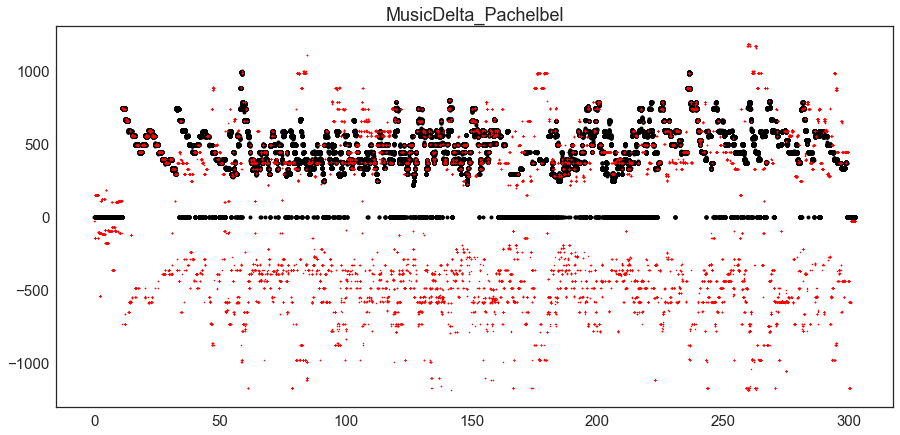

MusicDelta_SwingJazz


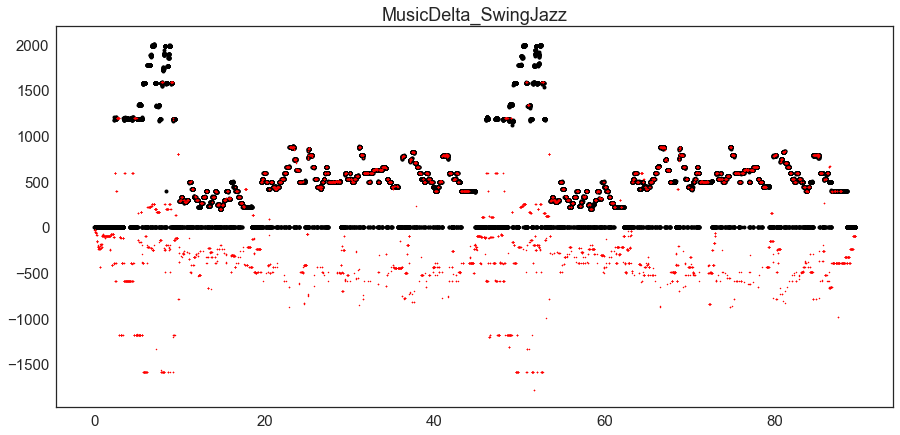

Phoenix_BrokenPledgeChicagoReel


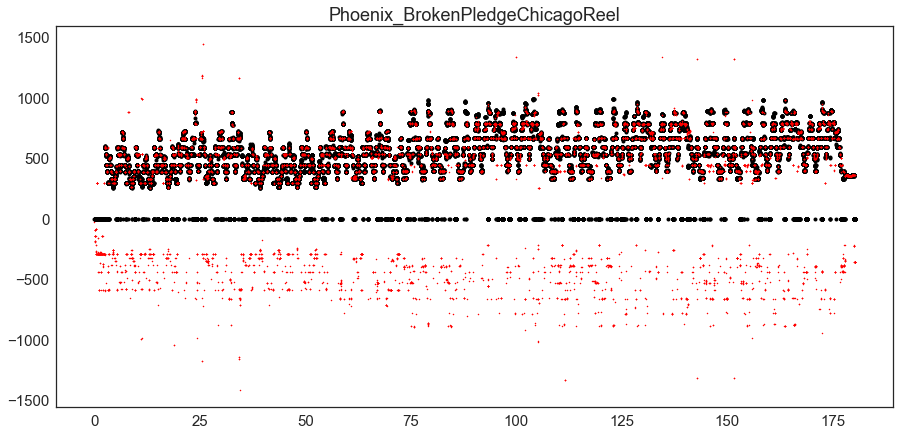

Phoenix_ColliersDaughter


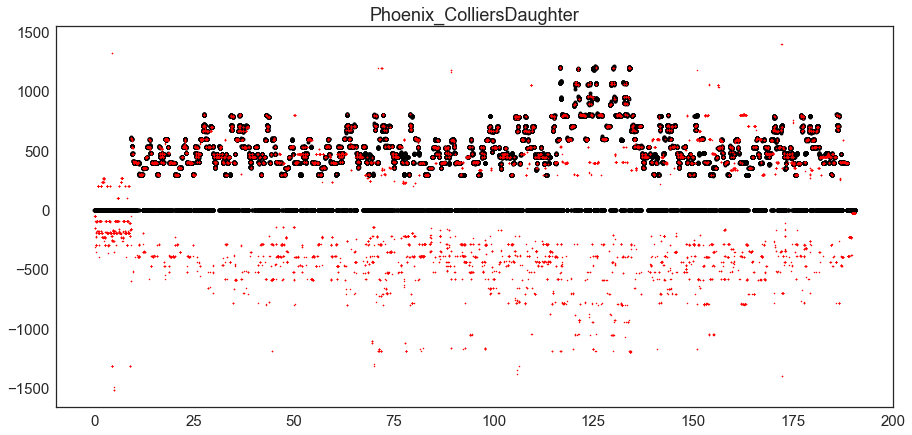

Phoenix_ElzicsFarewell


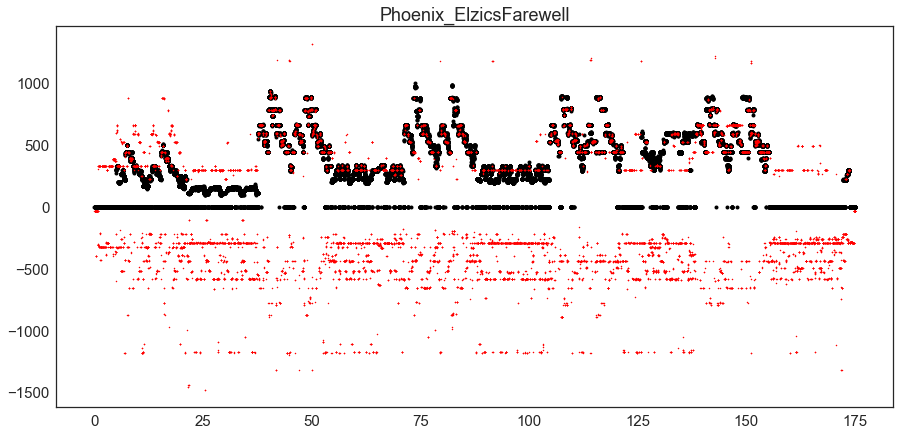

Phoenix_LarkOnTheStrandDrummondCastle


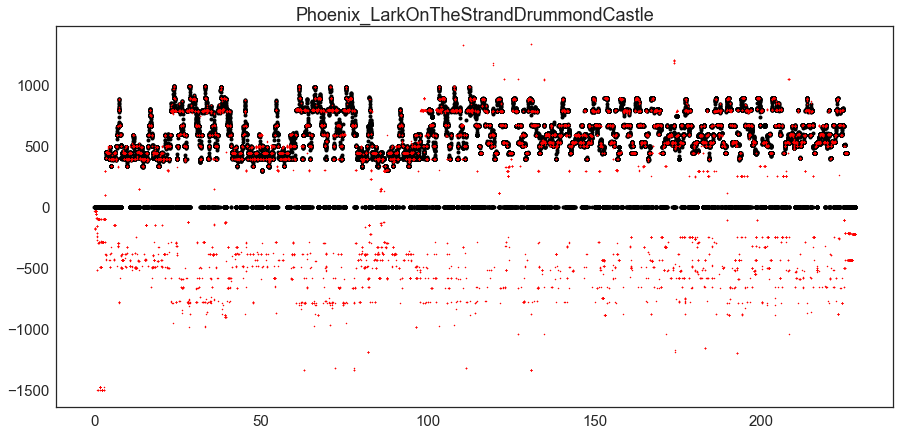

Phoenix_ScotchMorris


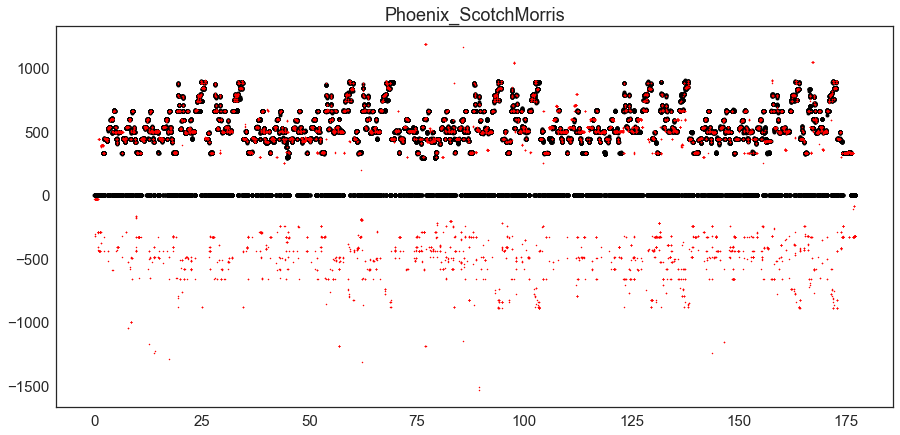

Phoenix_SeanCaughlinsTheScartaglen


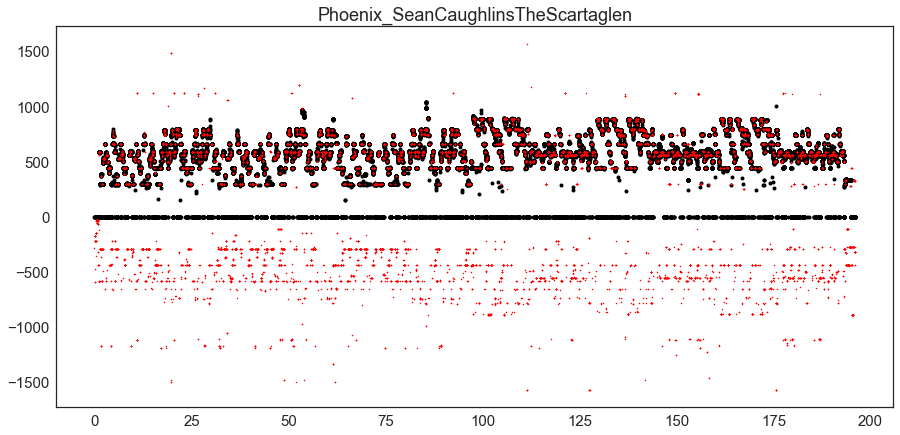

PortStWillow_StayEven


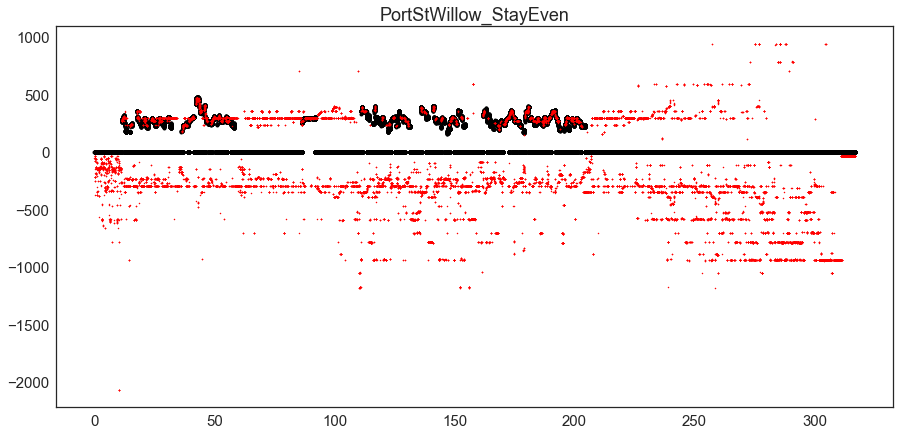

Schubert_Erstarrung


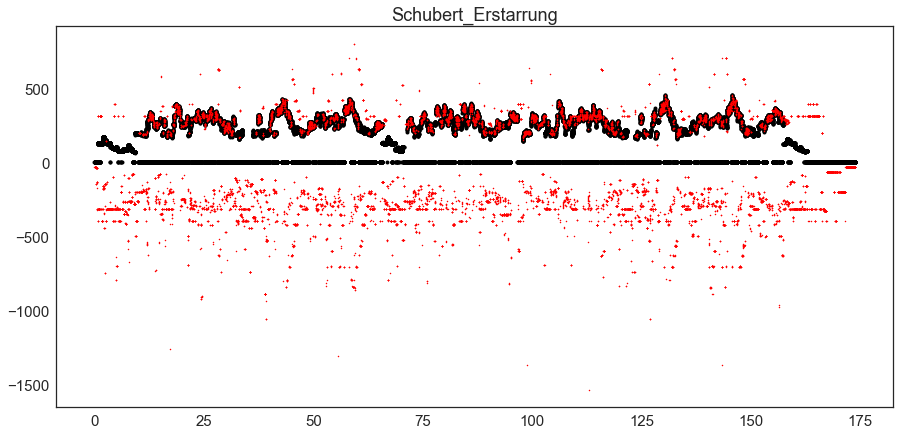

StrandOfOaks_Spacestation


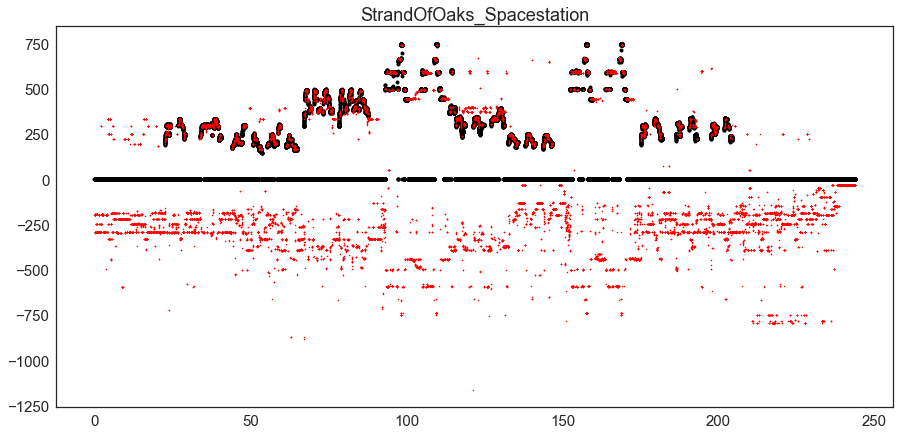

In [140]:
all_mel_scores = []
for trackid in dat_dict['test']:
    print(trackid)
    mtrack = mdb.MultiTrack(trackid)
    
    pred_path = "../experiment_output_submission/Model_11b_mel2_outputs/{}_prediction.npy".format(trackid)
    if not os.path.exists(pred_path) or not os.path.exists(mtrack.melody2_fpath):
        print(trackid)
        continue

    pitch_activations = np.load(pred_path)
    est_times, est_freqs = evaluate.pitch_activations_to_singlef0(pitch_activations, thresh)
    save_mel_prediction(
        est_times, est_freqs,
        "../experiment_output_submission/Model_11b_mel2_outputs/{}_mel2_prediction.txt".format(trackid))
    mel2 = mtrack.melody2_annotation
    mel2 = np.array(mel2).T
    ref_times, ref_freqs = (mel2[0], mel2[1])
    
    plt.figure(figsize=(15, 7))
    plt.title(trackid)
    plt.plot(ref_times, ref_freqs, '.k', markersize=8)
    plt.plot(est_times, est_freqs, '.r', markersize=3)
    plt.show()

    mel_scores = mir_eval.melody.evaluate(ref_times, ref_freqs, est_times, est_freqs)
    all_mel_scores.append(mel_scores)

mel_scores_df_partial = pd.DataFrame(all_mel_scores)

In [45]:
mel_scores_df_partial.describe()

,Overall Accuracy,Raw Chroma Accuracy,Raw Pitch Accuracy,Voicing False Alarm,Voicing Recall
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.619314,0.750617,0.691730,0.249080,0.617043
std,0.137896,0.128677,0.150087,0.152424,0.191002
min,0.295744,0.476139,0.407495,0.022636,0.254947
25%,0.550730,0.672693,0.593381,0.121165,0.488187
50%,0.658842,0.756113,0.696187,0.226346,0.590531
75%,0.715929,0.871733,0.821644,0.319162,0.756039
max,0.905112,0.990066,0.989609,0.587044,0.968600


In [46]:
mel_scores_df_partial.to_csv("../outputs/CNNmel2_argmax_scores.csv")

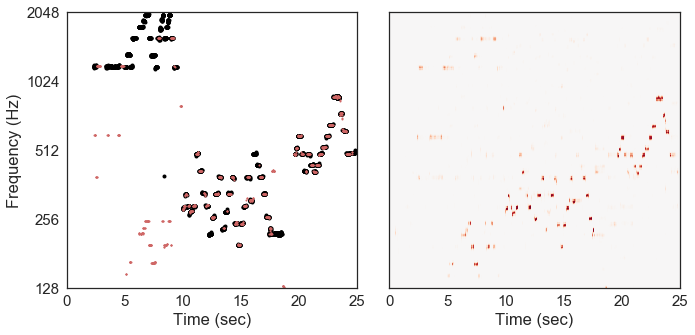

In [139]:
sns.set(font_scale=1.5)
sns.set_style('white')

trackid = 'MusicDelta_SwingJazz'
mtrack = mdb.MultiTrack(trackid)

pred_path = "../experiment_output_submission/Model_11b_mel2_outputs/{}_prediction.npy".format(trackid)
Y = np.load(pred_path)

est_times, est_freqs = get_mel_prediction(pred_path, best_thresh)
mel2 = mtrack.melody2_annotation
mel2 = np.array(mel2).T
ref_times, ref_freqs = (mel2[0], mel2[1])

est_freqs[est_freqs < 0] == 0

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.semilogy(ref_times, ref_freqs, '.k', basey=2, markersize=8)
plt.semilogy(est_times, est_freqs, '.', color="#CF6766", basey=2, markersize=4)

plt.ylim([2**7, 32.7*6])
plt.xlim([0, 25])
plt.yticks([2**i for i in range(7, 12)], [2**i for i in range(7, 12)])
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')

plt.subplot(1, 2, 2)
plt.imshow(Y[120:, :2150], origin='lower', cmap='RdBu_r', vmin=-1, vmax=1)
plt.yticks([])
plt.xticks(np.linspace(0, 2150, 6), [0, 5, 10, 15, 20, 25])
plt.xlabel('Time (sec)')
plt.axis('auto')

plt.tight_layout()
plt.savefig('../paper-figs/mel_qualatative.pdf', format='pdf', bbox_inches='tight')